In [151]:
from netpixi.integration.gt import Graph

g = Graph(directed=False)

In [152]:
import pandas as pd
import numpy as np

In [153]:
data = pd.read_csv("colaboration_comments.csv")

In [154]:
data

,COMMENT_ID,COMMIT_ID,URL,AUTHOR,CREATED_AT,BODY
0,22396772,47c1cd384b3deb0427e7e546e8d6b4346a65d816,https://github.com/selfhub/selfhub/pull/124#di...,zindlerb,2015-01-01T00:00:08Z,:sparkles: :pray: :sparkles:
1,22396775,a12155068a4feb03bf6b149b60830154ff52db0f,https://github.com/tsuru/tsuru/pull/1044#discu...,msabramo,2015-01-01T00:00:53Z,> Can you remove this empty line?\r\n\r\nDone.
2,9131174,f2c7da93b6607d2990335ad4c0b5f1b5c26f5a83,https://github.com/GoldenLions/GitHubScout/com...,myclamm,2015-01-01T00:00:55Z,Thanks man. That's from week 4 of Hack Reactor...
3,22396779,4c31e9b700de04c01f07c3f7d12afccbbf47237e,https://github.com/selfhub/selfhub/pull/125#di...,zindlerb,2015-01-01T00:01:44Z,"_.reduce would be more elegant, but your call"
4,22396780,2a0664c165aa3d1a4fec06d720d4ba393fefc7ae,https://github.com/emberjs/data/pull/2649#disc...,rwjblue,2015-01-01T00:01:54Z,Tiny nit-pick: can you name this something mea...
...,...,...,...,...,...,...
635297,9969493,d430ad5c96dc5a20ac90443cae1d534e21478c2d,https://github.com/AGV-IIT-KGP/git-sandbox/com...,rings360,2015-02-28T09:59:16Z,Asar Sunny <ring2rings93@gmail.com>
635298,9969494,3432d7bf3b10b57287979176ba569e414ad3af1e,https://github.com/veswill3/braintree-angular/...,jeffcarp,2015-02-28T09:59:16Z,Thank you for doing this! Would you mind if I ...
635299,25556037,062e3cb4c8aa6b3f2a8c338404bf699dfb8d2b6d,https://github.com/Robpol86/colorclass/pull/7#...,msabramo,2015-02-28T09:59:42Z,Done.
635300,25556038,062e3cb4c8aa6b3f2a8c338404bf699dfb8d2b6d,https://github.com/Robpol86/colorclass/pull/7#...,msabramo,2015-02-28T09:59:52Z,Done.


In [155]:
data['source'] = list(map(lambda x : x.split("https://github.com/")[-1].split('/')[0],data['URL']))

In [156]:
data = data.drop(['COMMIT_ID','COMMENT_ID','URL'],axis=1)

In [157]:
data

,AUTHOR,CREATED_AT,BODY,source
0,zindlerb,2015-01-01T00:00:08Z,:sparkles: :pray: :sparkles:,selfhub
1,msabramo,2015-01-01T00:00:53Z,> Can you remove this empty line?\r\n\r\nDone.,tsuru
2,myclamm,2015-01-01T00:00:55Z,Thanks man. That's from week 4 of Hack Reactor...,GoldenLions
3,zindlerb,2015-01-01T00:01:44Z,"_.reduce would be more elegant, but your call",selfhub
4,rwjblue,2015-01-01T00:01:54Z,Tiny nit-pick: can you name this something mea...,emberjs
...,...,...,...,...
635297,rings360,2015-02-28T09:59:16Z,Asar Sunny <ring2rings93@gmail.com>,AGV-IIT-KGP
635298,jeffcarp,2015-02-28T09:59:16Z,Thank you for doing this! Would you mind if I ...,veswill3
635299,msabramo,2015-02-28T09:59:42Z,Done.,Robpol86
635300,msabramo,2015-02-28T09:59:52Z,Done.,Robpol86


In [158]:
contrib_totais = data.groupby(['AUTHOR']).count()['source'].sort_values(ascending=False)
contrib_totais

AUTHOR
houndci             25587
nrel-bot             2997
jirikuncar           2136
bors-servo           2123
codeschool-kiddo     1843
                    ...  
kevinzurek              1
kevinykchan             1
kevinxucs               1
Specialkbyte            1
0-afflatus              1
Name: source, Length: 63722, dtype: int64

In [159]:
a = data.groupby(['source']).count()['AUTHOR'].sort_values(ascending=False)
b =a.mean()
c = a[a>b]
c.index

Index(['mozilla', 'aspnet', 'edx', 'apache', 'rust-lang',
       'GoogleCloudPlatform', 'caskdata', 'mozilla-b2g', 'Homebrew', 'NREL',
       ...
       'criteo-forks', 'raintank', 'runabove', 'leizongmin', 'Zeken',
       'garethr', 'TaiwanSparkUserGroup', 'jeffbcross', 'marco-c', 'tomekwi'],
      dtype='object', name='source', length=4929)

In [160]:
data_clean = data[data['source'].isin(c.index)]

In [161]:
data_clean

,AUTHOR,CREATED_AT,BODY,source
0,zindlerb,2015-01-01T00:00:08Z,:sparkles: :pray: :sparkles:,selfhub
1,msabramo,2015-01-01T00:00:53Z,> Can you remove this empty line?\r\n\r\nDone.,tsuru
3,zindlerb,2015-01-01T00:01:44Z,"_.reduce would be more elegant, but your call",selfhub
4,rwjblue,2015-01-01T00:01:54Z,Tiny nit-pick: can you name this something mea...,emberjs
5,bradenmacdonald,2015-01-01T00:02:33Z,"Yeah, I will just remove that. It is always True.",edx
...,...,...,...,...
635295,Zuhayr,2015-02-28T09:57:23Z,"Whoops, good call.",Baystation12
635296,XhmikosR,2015-02-28T09:58:15Z,@kasper93: are you sure [this](https://github....,kasper93
635297,rings360,2015-02-28T09:59:16Z,Asar Sunny <ring2rings93@gmail.com>,AGV-IIT-KGP
635299,msabramo,2015-02-28T09:59:42Z,Done.,Robpol86


In [162]:
contrib_arestas = data_clean.groupby(['AUTHOR']).count()['source'].sort_values(ascending=False)
contrib_arestas/contrib_totais

AUTHOR
0-afflatus    1.000000
0-wiz-0            NaN
0003088            NaN
0014               NaN
0022               NaN
                ...   
zzuegg        1.000000
zzuli4519          NaN
zzw840             NaN
zzz6519003    1.000000
zzzeek        0.714286
Name: source, Length: 63722, dtype: float64

In [163]:
#p = contrib_arestas/len(data_clean)
p = contrib_arestas/contrib_totais
p = p.dropna().sort_values(ascending=True)

In [164]:
data_clean.groupby(['source'])
lista = data_clean['AUTHOR'].value_counts().index.tolist()

In [165]:
n = data_clean.groupby('AUTHOR')['source'].apply(lambda x: list(np.unique(x)))
#g[g.columns['AUTHOR'] == 'houndci']
len(n.loc[n.index == 'houndci'][0])
#g.loc[g.str.contains('houndci')]

248

In [166]:
n = data_clean.groupby('AUTHOR')['source'].apply(lambda x: list(np.unique(x)))

In [167]:
same_repo_colab = data_clean.groupby('source')['AUTHOR'].apply(lambda x: list(np.unique(x)))
same_repo_colab

source
01org          [alexshalamov, chivakker, dawagner, jku, jlaak...
0xAX            [0xAX, Huddayn, akash0x53, ccope, georgehorrell]
10gen                                      [behackett, lovett89]
12factor                            [fernandes, gwmoura, lfilho]
13DeAnda                                      [AndrewDapkiewicz]
                                     ...                        
zotero         [adam3smith, apcshields, aurimasv, bwiernik, d...
zpp-2014-15                                   [trzysiek, xavrin]
zurb           [AntJanus, abdullahsalem, calmass, danielsamue...
zxqfox                              [andrewblond, eGavr, zxqfox]
zyndiecate                                          [zyndiecate]
Name: AUTHOR, Length: 4929, dtype: object

In [168]:
import itertools
import warnings
warnings.filterwarnings('ignore') 

g.add_vp('foco')
g.add_vp('colabs')
for index, row in same_repo_colab.iteritems():
    pares = itertools.combinations(row, 2)
    for i,par in enumerate(pares):
        try:
            g.add_vertex(par[0])
            u = g.get_vertex(par[0])
            u['foco'] = p[par[0]]
            u['colabs'] = contrib_arestas[par[0]]
        except Exception as inst:
            pass
        try:
            g.add_vertex(par[1])
            v = g.get_vertex(par[1])
            v['foco'] = p[par[1]]
            v['colabs'] = contrib_arestas[par[1]]
        except Exception as inst:
            pass
        finally:
            try:
                g.add_edge(par[0],par[1])
            except:
                pass

In [169]:
n = g.num_vertices()
print('Número de vértices de g:', n)

Número de vértices de g: 27778


In [170]:
m = g.num_edges()
print('Número de arestas de g:', m)

Número de arestas de g: 626213


In [171]:
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

385794753

In [172]:
d = m / max_edges
d
print(f'Densidade é {d}')

Densidade é 0.0016231765598947894


In [173]:
import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *

In [174]:
data = gt_data(g)
data.head(5)

,foco,colabs
id,,
alexshalamov,1.000000,2
chivakker,1.000000,2
dawagner,0.952381,20
jku,0.800000,8
jlaako,1.000000,14


In [175]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

In [176]:
data['degree'] = degrees
data.sort_values(by='degree',ascending=False).head(30)

,foco,colabs,degree
id,,,
houndci,0.963849,24662,1211
GrahamCampbell,0.934354,1281,882
stof,0.959146,1033,811
pires,0.678571,19,740
tamird,0.571429,12,717
alexeagle,0.625000,10,633
sindresorhus,0.967136,412,627
catap,1.000000,11,615
huitseeker,1.000000,3,615


In [177]:
data['degree'].describe().to_frame()

,degree
count,27778.000000
mean,45.086975
std,76.232098
min,1.000000
25%,5.000000
50%,13.000000
75%,45.000000
max,1211.000000


In [178]:
data['foco'].describe().to_frame()

,foco
count,27778.000000
mean,0.906298
std,0.193596
min,0.032258
25%,0.928571
50%,1.000000
75%,1.000000
max,1.000000


In [179]:
from graph_tool import clustering

lc = clustering.local_clustering(g)
g.add_vp('clustering', lc)
data = gt_data(g)

In [180]:
gt_data(g).sort_values(by="colabs",ascending=False)
df = gt_data(g)
selRows = data[data['colabs'] > 1000].index
data = data.drop(selRows,axis=0)

In [181]:
sns.histplot(data['degree'])

KeyError: 'degree'

In [ ]:
sns.histplot(data['foco'])

In [ ]:
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

In [ ]:
sns.scatterplot(x=data['clustering'], y=data['foco']);

In [ ]:
variavel_controle = numero_de_vizinhos(degree)

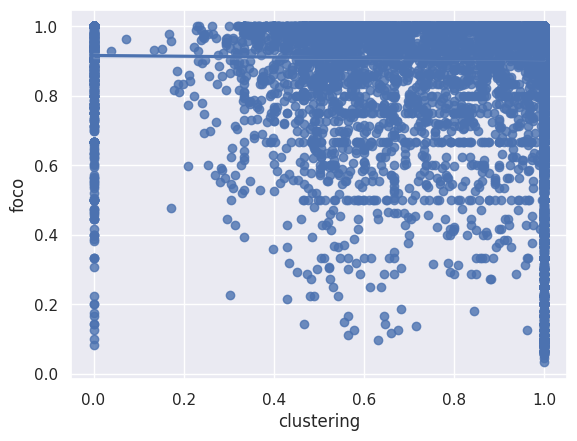

In [101]:
sns.regplot(x=gt_data(g)['clustering'], y=gt_data(g)['foco']);

In [114]:
result = reg.linear(data=gt_data(g), formula='foco ~ clustering + degree')

PatsyError: Error evaluating factor: NameError: name 'degree' is not defined
    foco ~ clustering + degree
                        ^^^^^^

In [ ]:
result.summary()

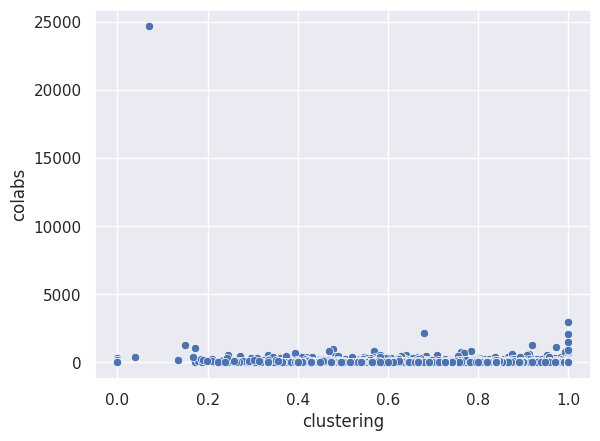

In [104]:
sns.scatterplot(x=gt_data(g)['clustering'], y=gt_data(g)['colabs']);

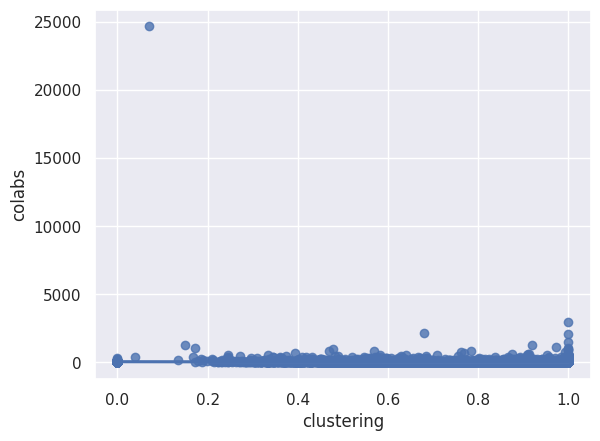

In [105]:
sns.regplot(x=gt_data(g)['clustering'], y=gt_data(g)['colabs']);

In [106]:
result = reg.linear(data=gt_data(g), formula='colabs ~ clustering')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colabs   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.39e-24
Time:                        14:05:25   Log-Likelihood:            -1.7983e+05
No. Observations:               27778   AIC:                         3.597e+05
Df Residuals:                   27776   BIC:                         3.597e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8257      3.790     14.731      0.000      48.398      63.254
clustering   -40.8707      4.024    -10.157      0.000     -48.758     -32.984
==============================================================================
Omnibus:                   122425.274   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     553503582413.690
Skew:                         139.935   Prob(JB):                         0.00
Kurtosis:                   21869.526   Cond. No.                         7.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

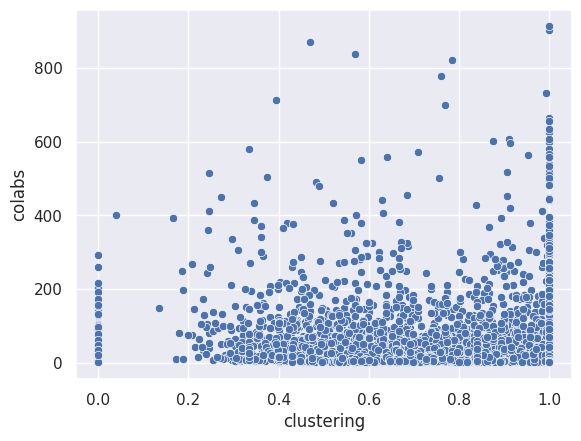

In [111]:
sns.scatterplot(x=data_cl['clustering'], y=data_cl['colabs']);

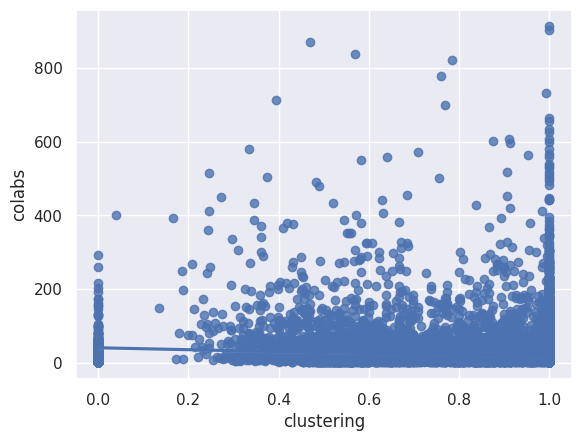

In [112]:
sns.regplot(x=data_cl['clustering'], y=data_cl['colabs']);

In [113]:
result = reg.linear(data=data_cl, formula='colabs ~ clustering')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colabs   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     588.4
Date:                Mon, 15 May 2023   Prob (F-statistic):          1.22e-128
Time:                        14:15:32   Log-Likelihood:            -1.4306e+05
No. Observations:               27766   AIC:                         2.861e+05
Df Residuals:                   27764   BIC:                         2.861e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8396      1.012     40.362      0.000      38.856      42.823
clustering   -26.0586      1.074    -24.257      0.000     -28.164     -23.953
==============================================================================
Omnibus:                    37310.570   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10048712.674
Skew:                           7.688   Prob(JB):                         0.00
Kurtosis:                      94.920   Cond. No.                         7.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
import netpixi

In [32]:
gt_save(g, 'colabs.net.gz')

In [33]:
g = gt_load('colabs.net.gz')

In [ ]:
r1 = netpixi.render('colabs.net.gz');

In [34]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'colabs_sfdp.net.gz')
r2 = netpixi.render('colabs_sfdp.net.gz',infinite=True);

In [ ]:
r2 = netpixi.render('colabs_sfdp.net.gz',infinite=True);

In [37]:
#Ajustando propriedades
r2.vertex_scale('foco', 1, 10)
r2.edge_default( width=1)

<img src="colabs_sfdp.net.gz.png"/>

In [ ]:
numero_de_contribuicoes_que_envolvem_repos_para_arestas / contribuições_totais